# Loan Application Status Prediction

Problem Statement:
Depending upon various features or predictors, we have to predict whether the loan of the applicant will be approved (Loan_status) or not.

In [1]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
390,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural,Y
542,LP002753,Female,No,1,Graduate,NaN,3652,0.0,95.0,360.0,1.0,Semiurban,Y
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
213,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
337,LP002112,Male,Yes,2,Graduate,Yes,2500,4600.0,176.0,360.0,1.0,Rural,Y


# Exploratory Data Analysis (EDA)

In [3]:
#Checking the shape of the dataset

df.shape

(614, 13)

The dataset consists of 614 rows and 13 columns, of which Loan_Status is the target variable.

In [4]:
#Checking the columns of the dataset

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
#Checking the Info (RangeIndex, datatypes, columns and memory usage) of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the above method, we can conclude that some of the columns (Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History) consist of null values. LoanID is unique for every customer, so we can remove this column later from our dataset.

In [6]:
#Checking the null values present in the dataset

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

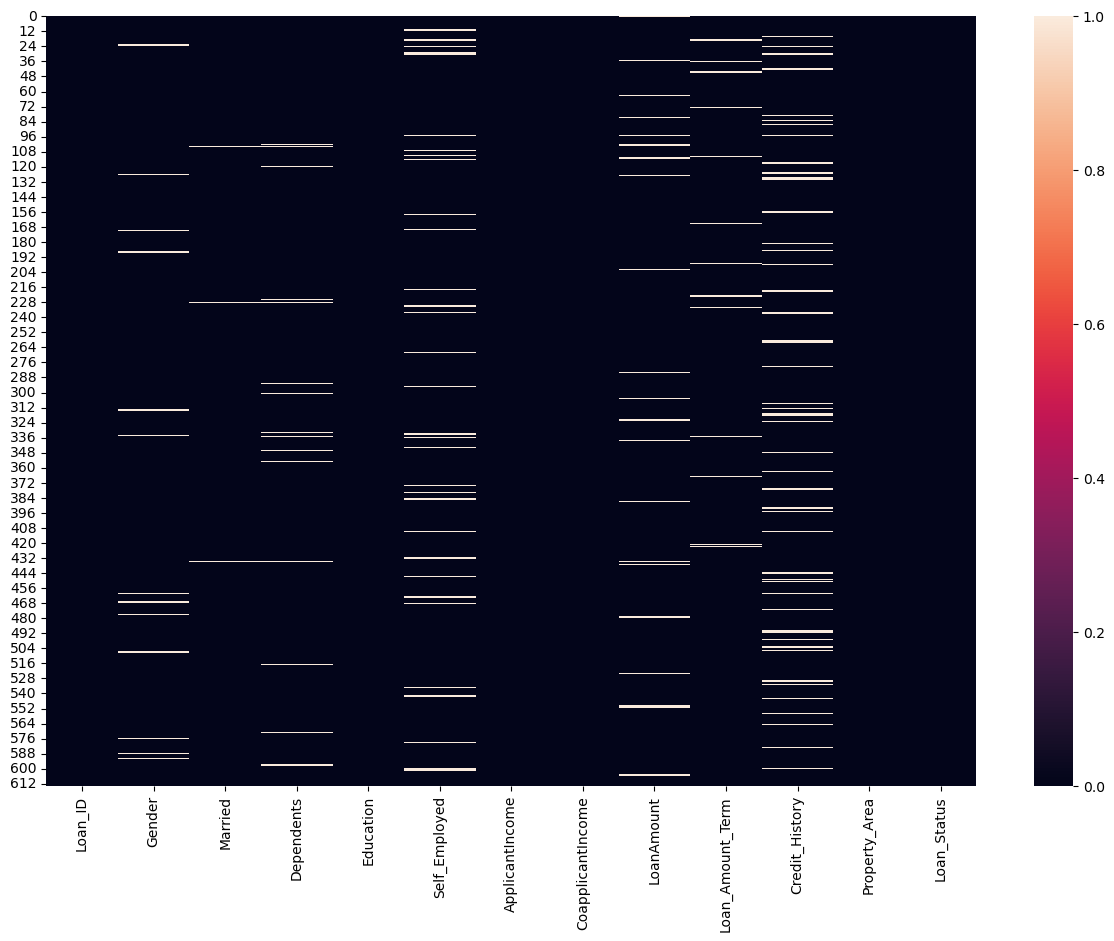

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [8]:
#Checking the value counts of each column in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
**************************************************


Male      489
Female    112
Name: Gender, dtype: int64
**************************************************


Yes    398
No     213
Name: Married, dtype: int64
**************************************************


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**************************************************


Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************


No     500
Yes     82
Name: Self_Employed, dtype: int64
**************************************************


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
**************************

In [9]:
#Checking the statistical information of each numerical column of our dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [10]:
#Dividing the dataset into numerical and categorical columns depedning on the data types of the columns
categorical_col= []
for i in df.dtypes.index:
    if df[i].dtypes==object:
        categorical_col.append(i)
        
print("Categorical Columns:", categorical_col)
print('\n')
print('*'*100)
print('\n')

numerical_col= []
for i in df.dtypes.index:
    if df[i].dtypes!=object:
        numerical_col.append(i)
        
print("Numerical Columns:", numerical_col)

Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


****************************************************************************************************


Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Data Visualisation

Univariate Analysis & Bivariate Analysis

In [11]:
sns.set()

Y    422
N    192
Name: Loan_Status, dtype: int64

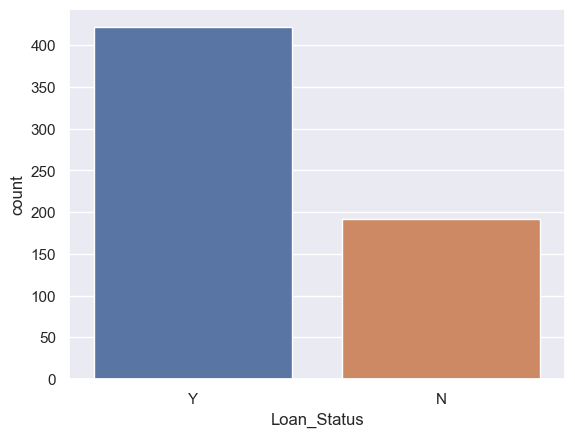

In [12]:
#Checking the Loan Status of all the applicants

sns.countplot(x='Loan_Status', data=df)
df["Loan_Status"].value_counts()

In [13]:
Yes_percent = round(df['Loan_Status'].value_counts()[0]/df.shape[0]*100,2)
print("Out of 614 applicants, {}% were able to get the loan". format(Yes_percent))

Out of 614 applicants, 68.73% were able to get the loan


Male      489
Female    112
Name: Gender, dtype: int64

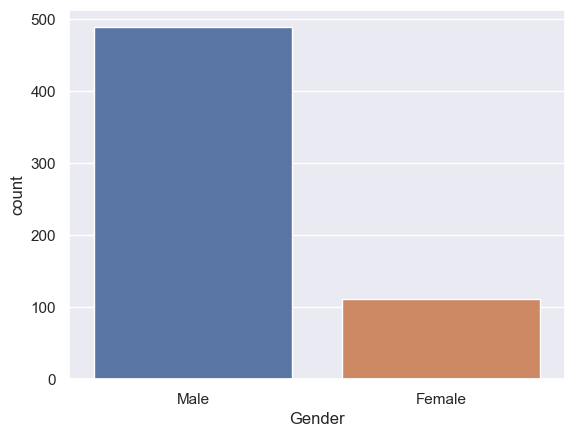

In [14]:
#Checking the number of males and females in the dataset

sns.countplot(x='Gender', data=df)
df['Gender'].value_counts()

<Axes: xlabel='Gender', ylabel='count'>

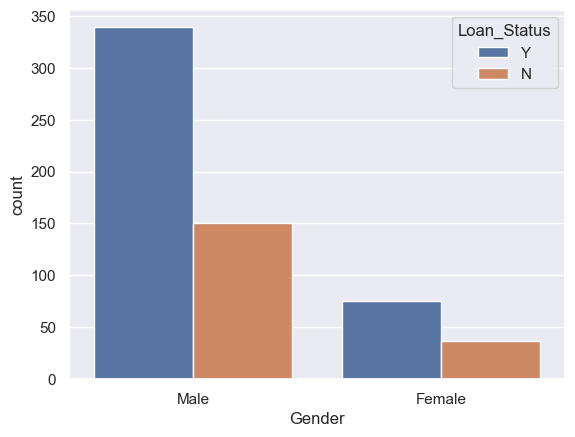

In [15]:
#This allows for visualizing the distribution of loan approvals and denials across genders.

sns.countplot(x='Gender', data=df, hue='Loan_Status')

In [16]:
pd.crosstab(df['Gender'], df['Loan_Status'], normalize='index').apply(lambda x: round(x * 100, 2))

Loan_Status,N,Y
Gender,,
Female,33.04,66.96
Male,30.67,69.33


Yes    398
No     213
Name: Married, dtype: int64

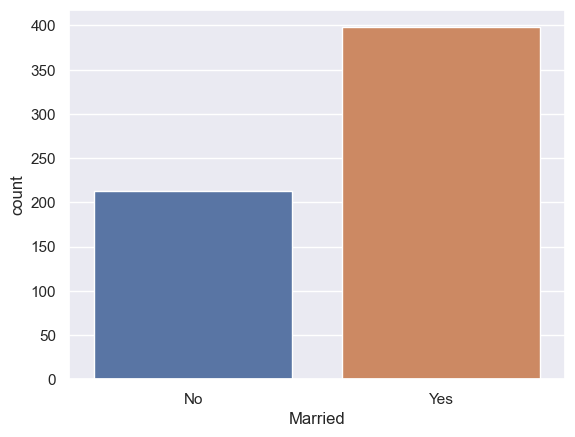

In [17]:
#Checking the number of people who are married and not married

sns.countplot(x='Married',data=df)
df['Married'].value_counts()

<Axes: xlabel='Married', ylabel='count'>

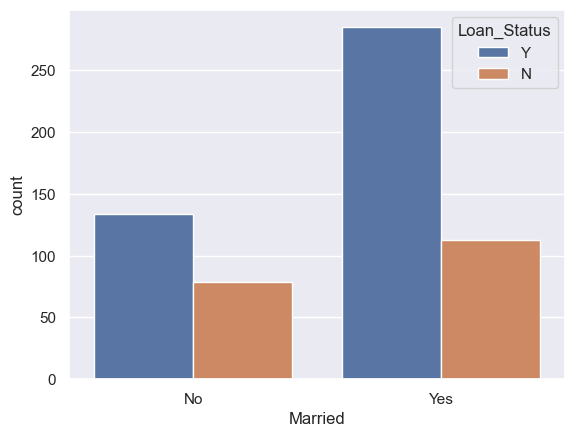

In [18]:
#This allows for visualizing the distribution of loan approvals and denials on the basis of marital status.

sns.countplot(x='Married',data=df,hue='Loan_Status')

In [19]:
pd.crosstab(df['Married'],df['Loan_Status'],normalize='index').apply(lambda x: round(x*100,2))

Loan_Status,N,Y
Married,,
No,37.09,62.91
Yes,28.39,71.61


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

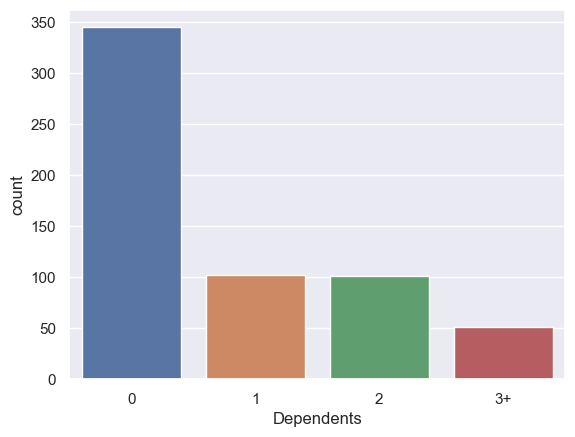

In [20]:
#Checking the number of Dependents in the dataset

sns.countplot(x='Dependents', data=df)
df['Dependents'].value_counts()

<Axes: xlabel='Dependents', ylabel='count'>

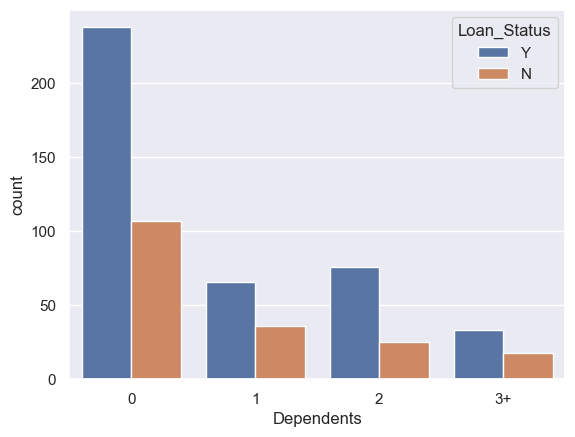

In [21]:
#This allows for visualizing the distribution of loan approvals and denials on the basis of number of depedents.

sns.countplot(x='Dependents', data=df, hue='Loan_Status')

In [22]:
pd.crosstab(df['Dependents'],df['Loan_Status'],normalize='index').apply(lambda x : round(x*100,2))

Loan_Status,N,Y
Dependents,,
0,31.01,68.99
1,35.29,64.71
2,24.75,75.25
3+,35.29,64.71


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

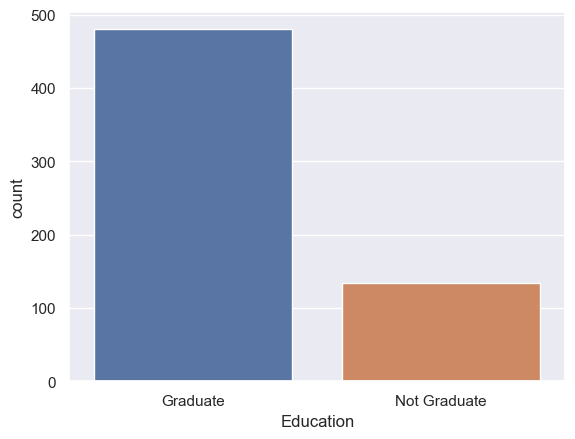

In [23]:
#Checking the number of graduated and non graduates in the dataset

sns.countplot(x='Education',data=df)
df['Education'].value_counts()

<Axes: xlabel='Education', ylabel='count'>

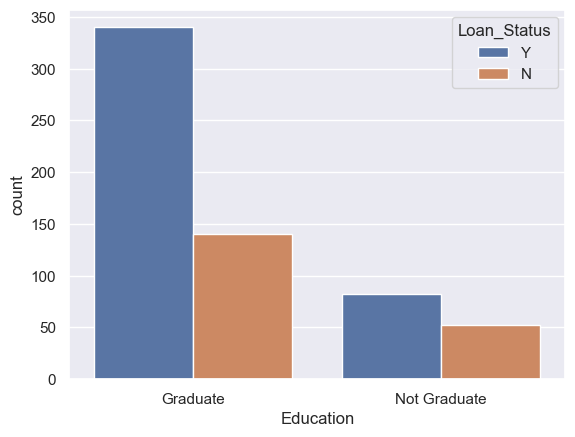

In [24]:
#This allows for visualizing the distribution of loan approvals and denials on the basis of Education.

sns.countplot(x='Education',data=df,hue='Loan_Status')

In [25]:
pd.crosstab(df['Education'],df['Loan_Status'], normalize='index').apply(lambda x: round(x*100,2))

Loan_Status,N,Y
Education,,
Graduate,29.17,70.83
Not Graduate,38.81,61.19


In [26]:
categ_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area']

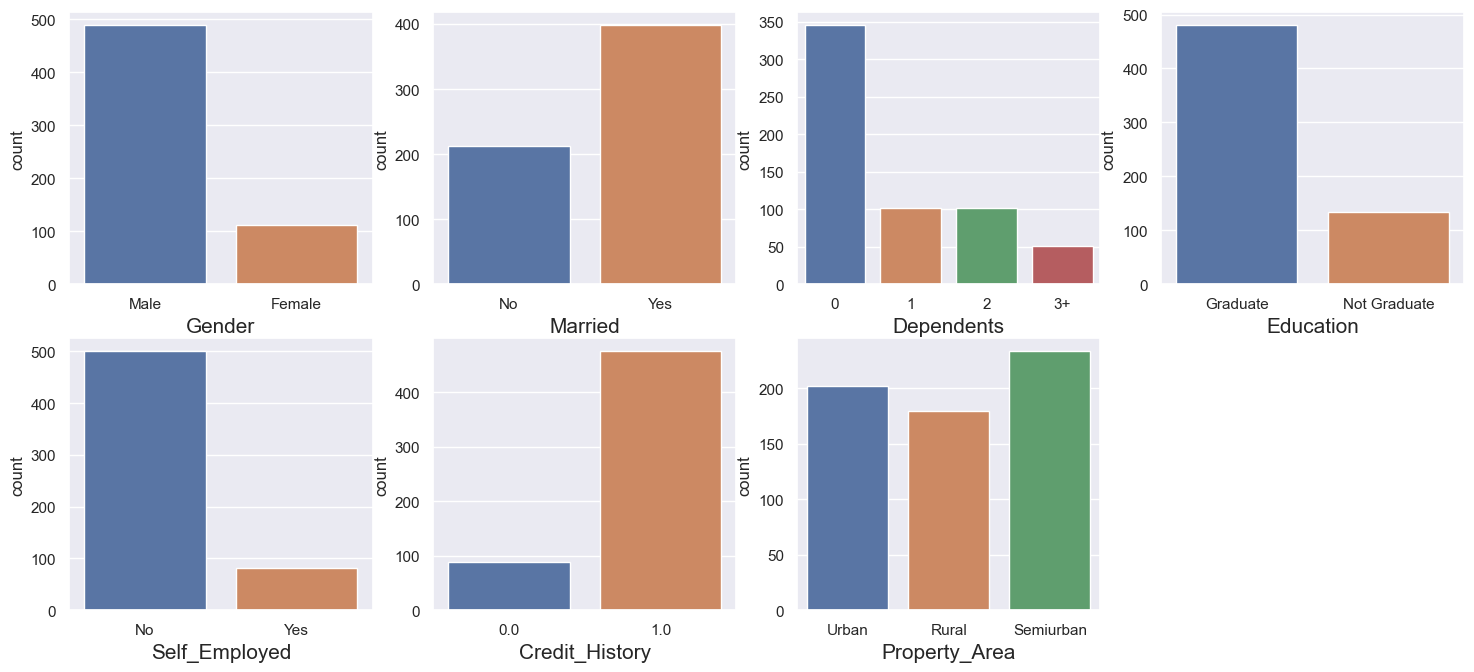

In [27]:
plt.figure(figsize=(18,12))
plotnumber=1
for i in categ_col:
    if plotnumber<=8:
        plt.subplot(3,4,plotnumber)
        sns.countplot(x=i,data=df)
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

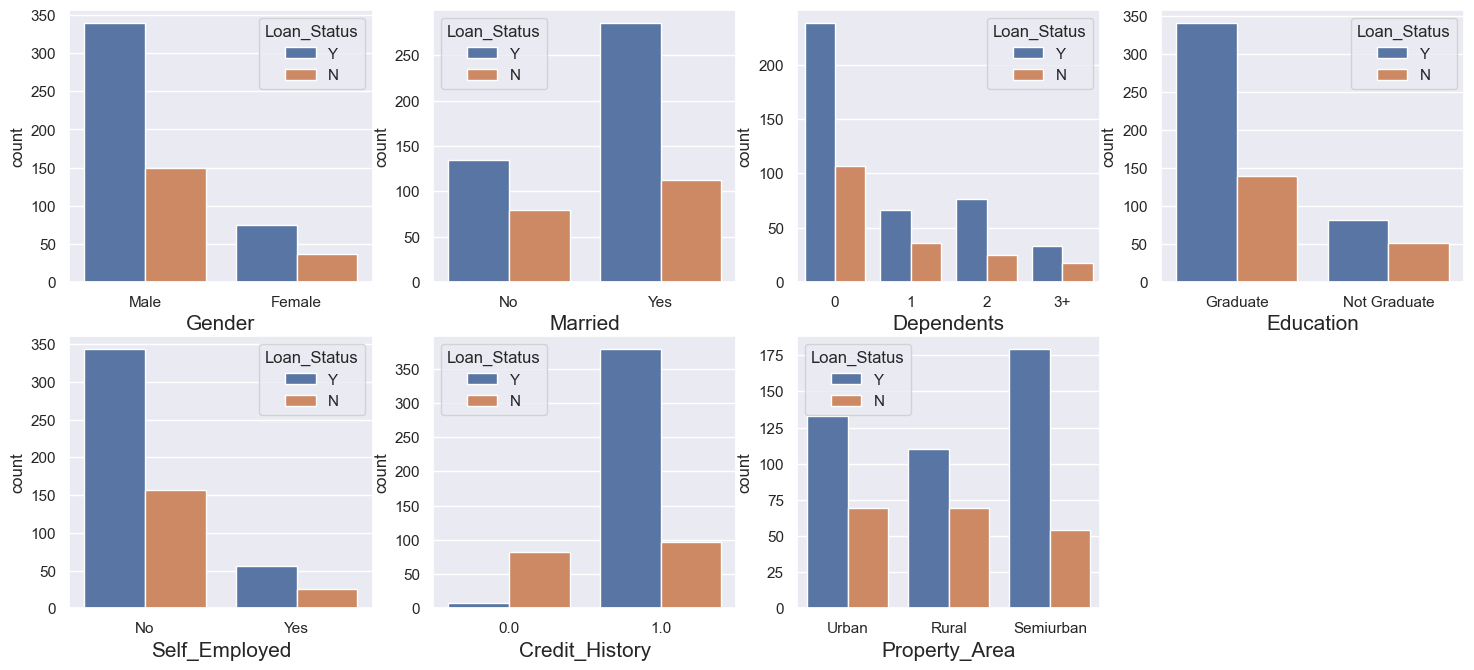

In [28]:
plt.figure(figsize=(18,12))
plotnumber=1
for i in categ_col:
    if plotnumber<=8:
        plt.subplot(3,4,plotnumber)
        sns.countplot(x=i,data=df,hue='Loan_Status')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

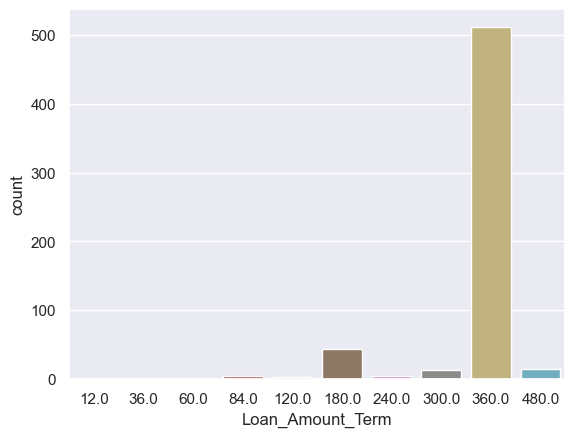

In [29]:
sns.countplot(x='Loan_Amount_Term',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

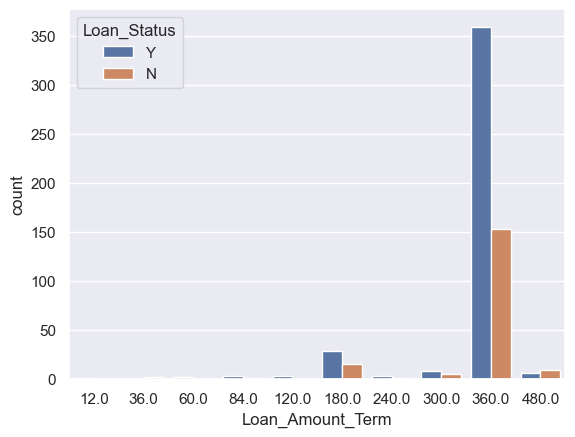

In [30]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

In [31]:
for i in categ_col:
    print(pd.crosstab(df[i],df['Loan_Status'], normalize='index').apply(lambda x: round(x*100,2)))
    print('\n')
    print('*'*75)
    print('\n')

Loan_Status      N      Y
Gender                   
Female       33.04  66.96
Male         30.67  69.33


***************************************************************************


Loan_Status      N      Y
Married                  
No           37.09  62.91
Yes          28.39  71.61


***************************************************************************


Loan_Status      N      Y
Dependents               
0            31.01  68.99
1            35.29  64.71
2            24.75  75.25
3+           35.29  64.71


***************************************************************************


Loan_Status       N      Y
Education                 
Graduate      29.17  70.83
Not Graduate  38.81  61.19


***************************************************************************


Loan_Status        N      Y
Self_Employed              
No             31.40  68.60
Yes            31.71  68.29


***************************************************************************


Loan_Status     

I've made the following conclusion after completing the data visualization:

1.Males have high chances for loan approvals if the applicant is married, so they have higher chances for approvals.

2.Applicants with 0 dependents are getting approvals as compared to applicants with 1, 2, and 3+ dependents.

3.Graduates are more likely to get their loans approved.

4.If someone has a good credit history, they will have a very high chance of getting their loan approved.

5.People residing in semi-urban areas are more likely to get the loan.

6.If the applicant is not self-employed, then they will get their loan approved more than those who are self-employed.

7.Last but not least, if the applicant is asking for the loan for 360 months, then they will get the loan approved more easily.

In [33]:
numeric_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

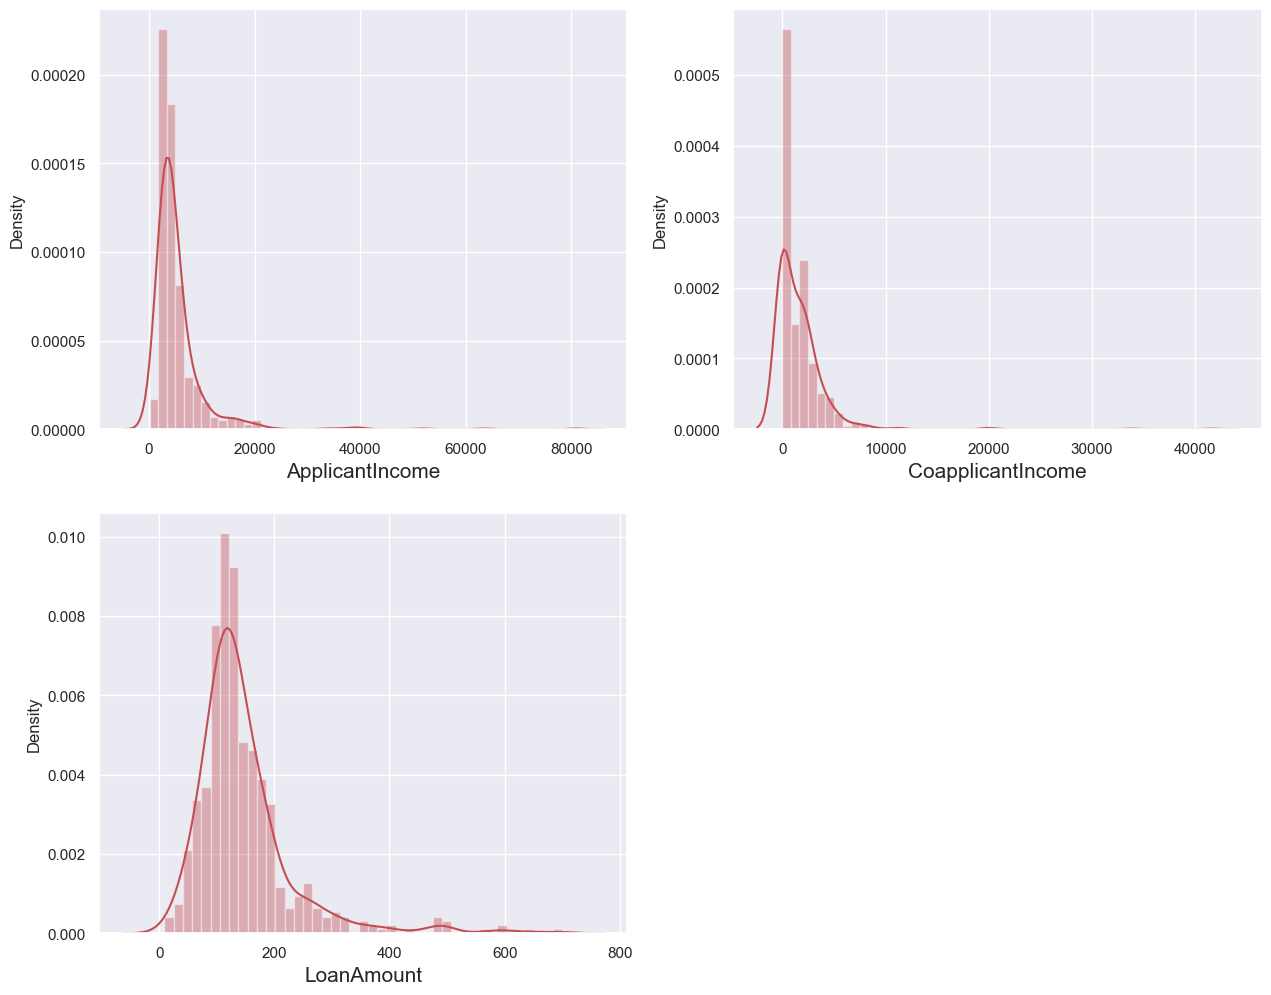

In [35]:
plt.figure(figsize=(15,12))
plotnumber=1
for i in numeric_col:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

The distribution plot clearly indicated that the numerical columns are rightly skewed, which will be removed later.

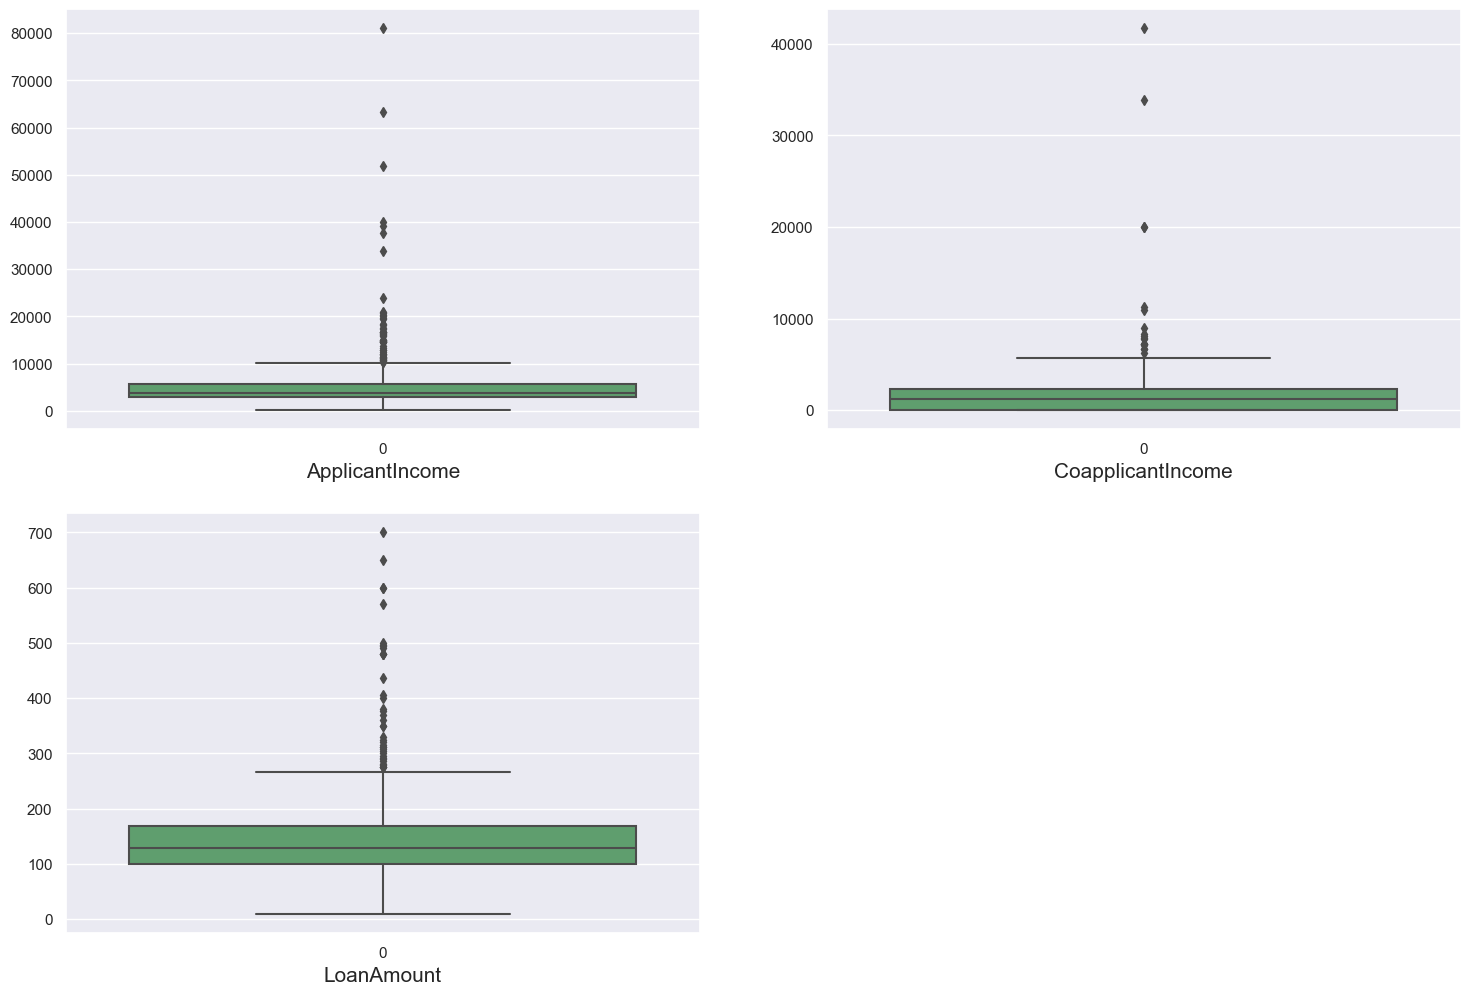

In [36]:
plt.figure(figsize=(18,12))
plotnumber=1
for i in numeric_col:
    if plotnumber<=4:
        plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i],color='g')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

The boxplot clearly indicated that the numerical columns have outliers in them.

In [37]:
#Encoding the target column with integer values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

Multivariate Analysis

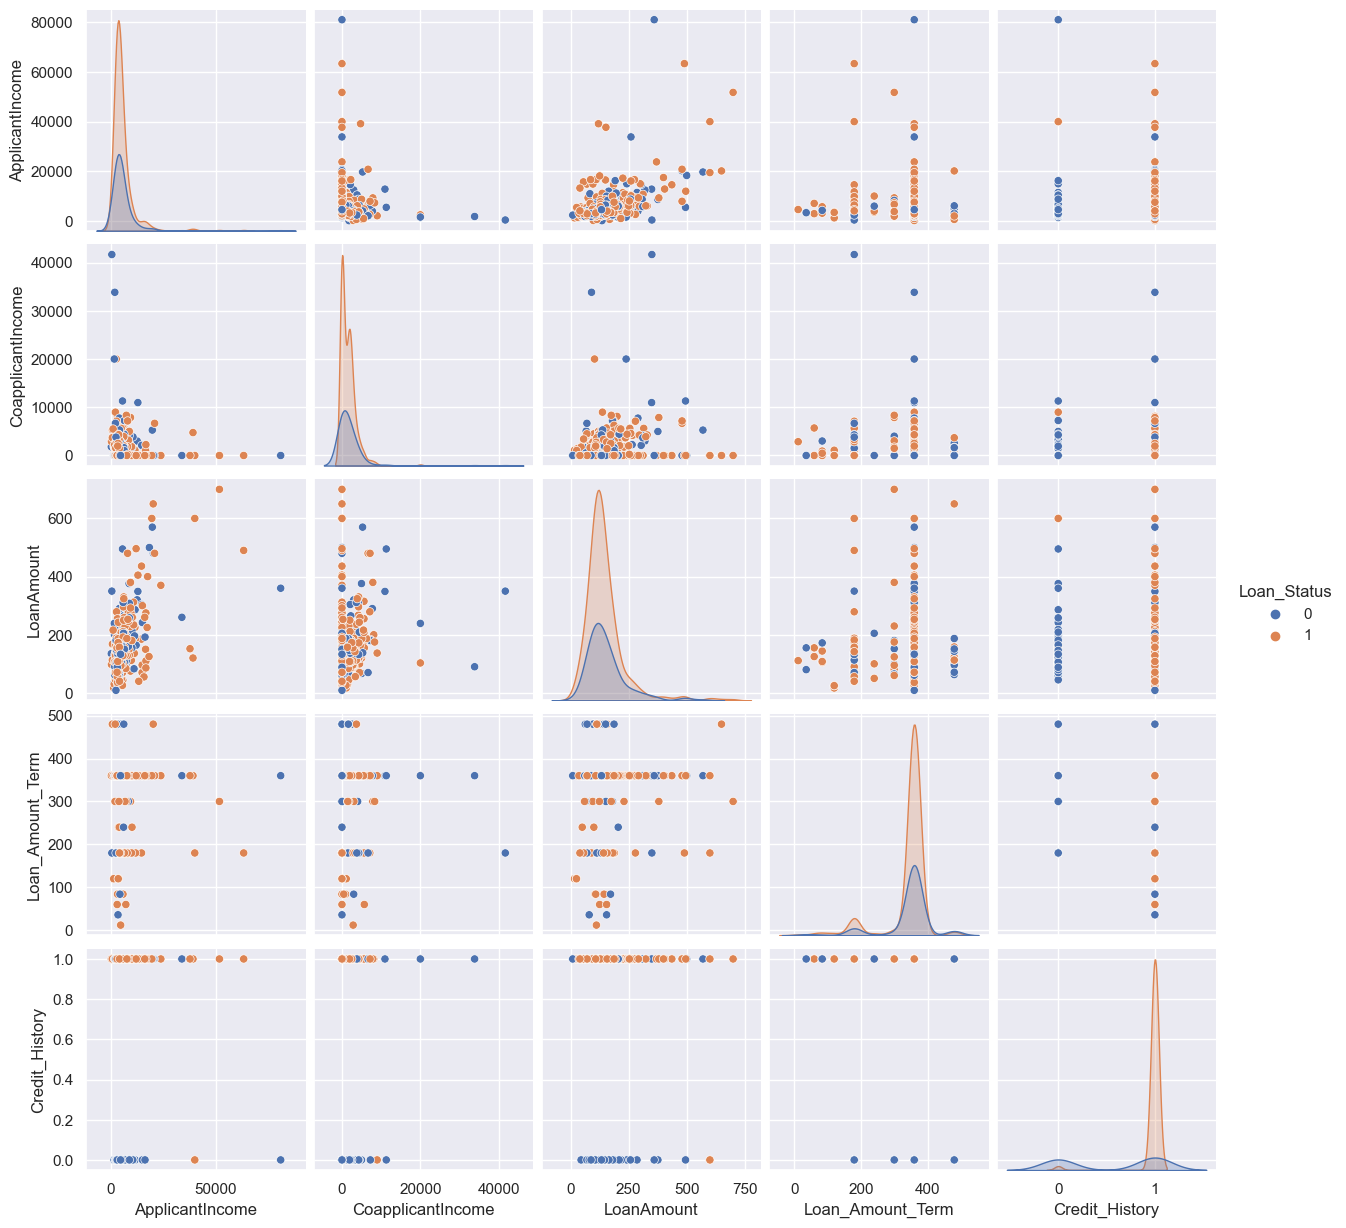

In [38]:
sns.pairplot(df,hue='Loan_Status')

In [39]:
#Finding the correlation information of the numerical columns of the dataset

df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

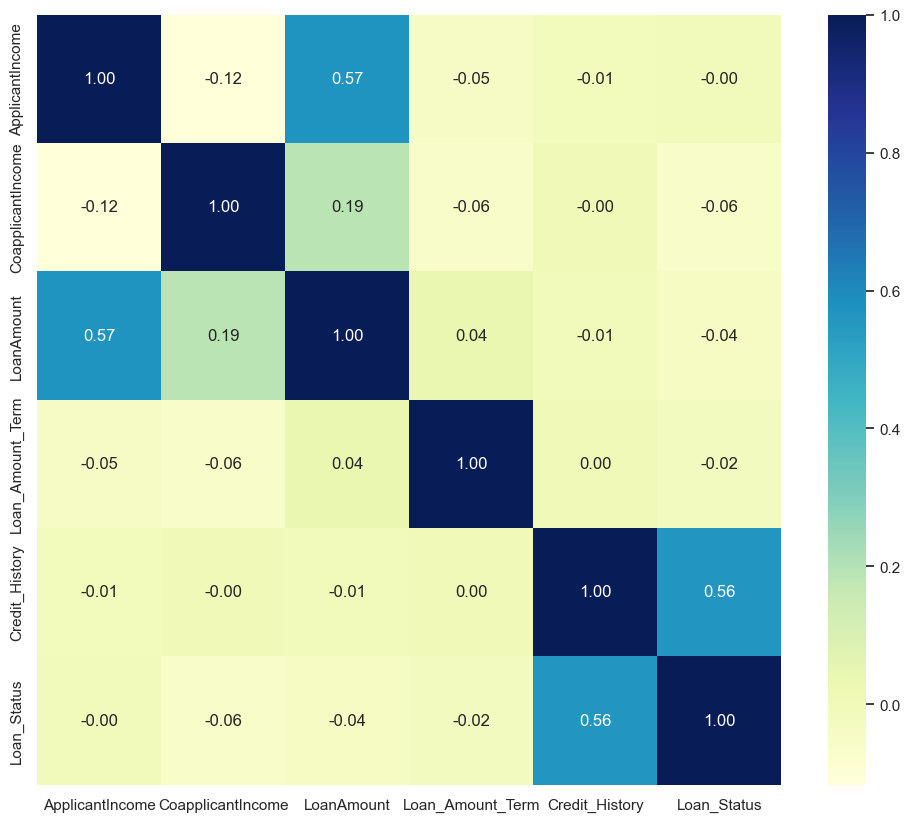

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, linecolor='black',fmt='0.2f',cmap='YlGnBu')

I can't see any correlation between the independent variables, but I can conclude that the loan status is directly proportional to the credit history of the applicant.

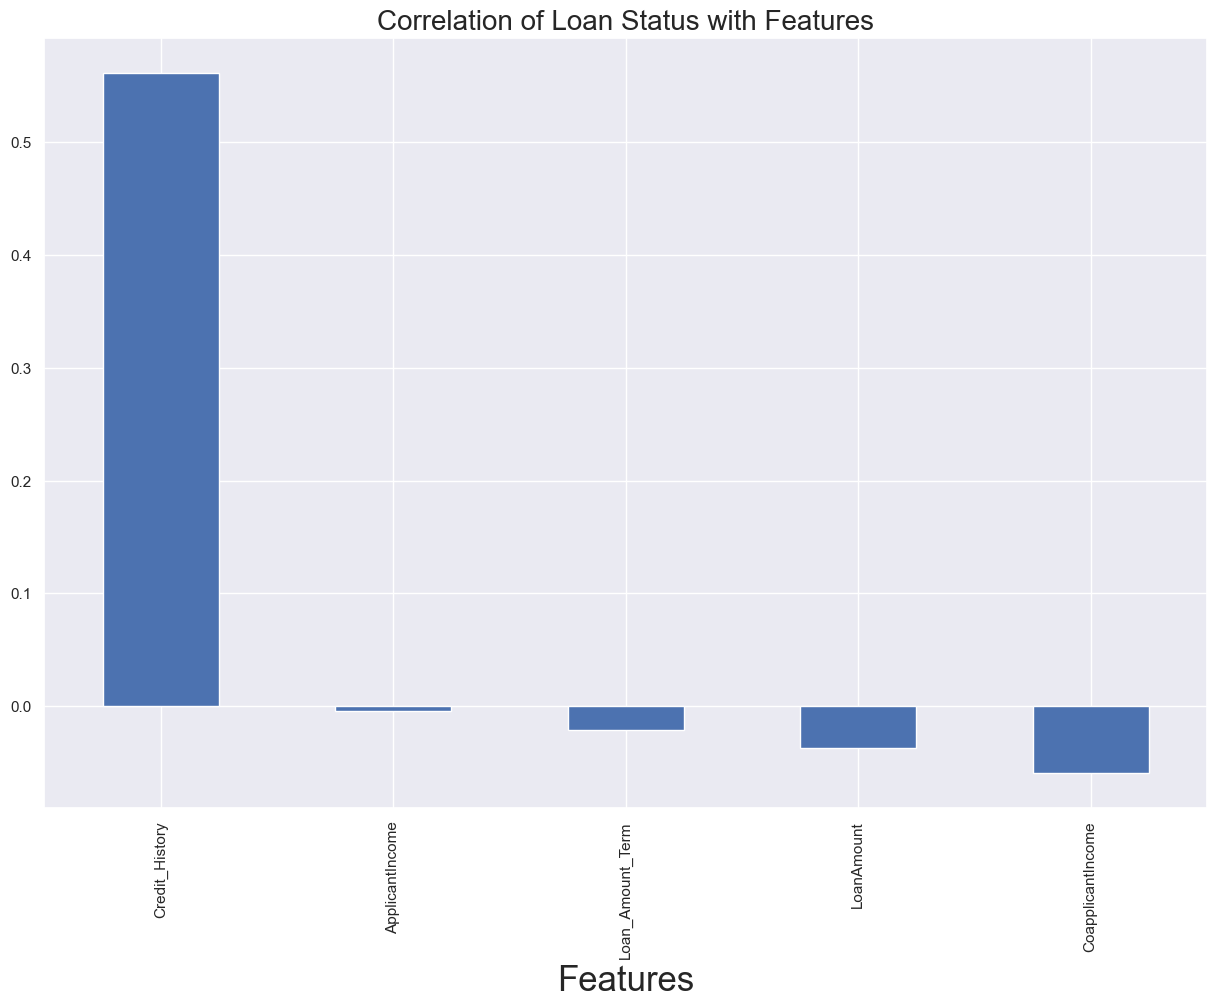

In [41]:
plt.figure(figsize=(15,10))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.title('Correlation of Loan Status with Features',fontsize=20)
plt.xlabel('Features', fontsize=25)
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

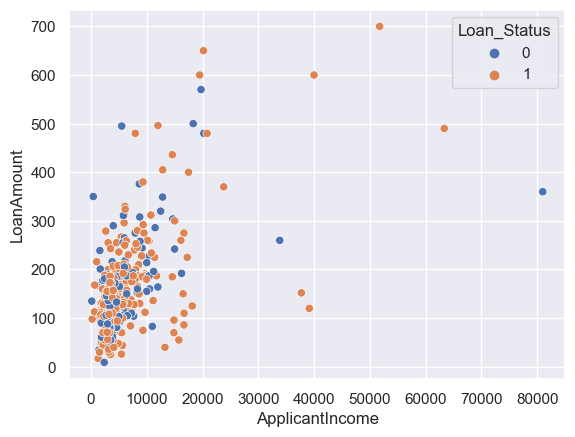

In [42]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

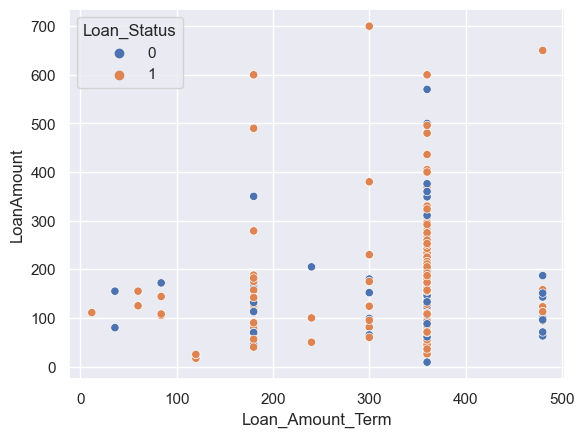

In [43]:
sns.scatterplot(x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',data=df)

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

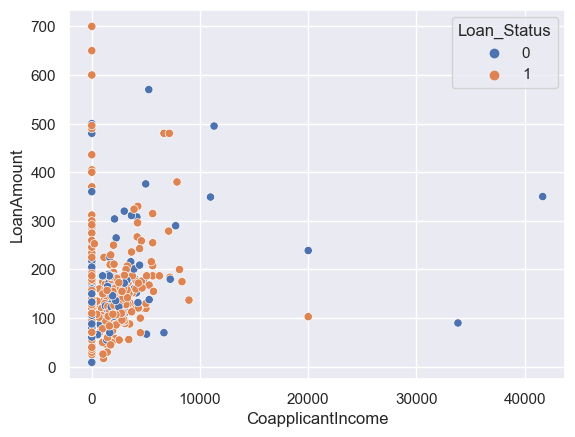

In [44]:
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

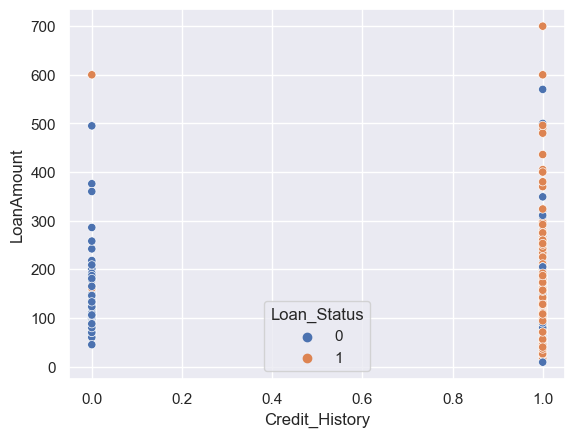

In [45]:
sns.scatterplot(x='Credit_History',y='LoanAmount',hue='Loan_Status',data=df)

Imputing the null values in the dataset

In [46]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
categorical_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [48]:
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [49]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [50]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
#Dropping Loan_ID column, as every observation is unique in this column and does not have any significant meaning.

df.drop('Loan_ID',axis=1,inplace=True)

In [52]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [53]:
#Changing the datatype of some columns from float to int

df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(int)
df['Credit_History']=df['Credit_History'].astype(int)
df['CoapplicantIncome']=df['CoapplicantIncome'].astype(int)
df['ApplicantIncome']=df['ApplicantIncome'].astype(int)
df['LoanAmount']=df['LoanAmount'].astype(int)

In [54]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int32
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status           int32
dtype: object

In [55]:
df['Dependents'].replace("3+",3,inplace=True)

In [56]:
df['Dependents']=df['Dependents'].astype(int)

In [57]:
df.dtypes

Gender               object
Married              object
Dependents            int32
Education            object
Self_Employed        object
ApplicantIncome       int32
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status           int32
dtype: object

In [58]:
df['Income']=df['ApplicantIncome']+ df['CoapplicantIncome']

<Axes: xlabel='Income', ylabel='Density'>

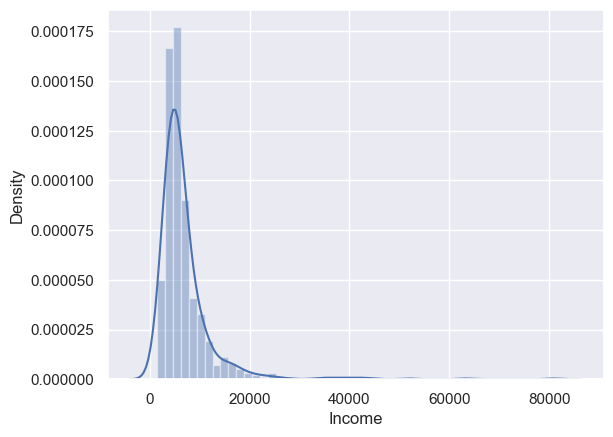

In [59]:
sns.distplot(df['Income'])

In [60]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [61]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,128,360,1,Urban,1,5849
1,Male,Yes,1,Graduate,No,128,360,1,Rural,0,6091
2,Male,Yes,0,Graduate,Yes,66,360,1,Urban,1,3000
3,Male,Yes,0,Not Graduate,No,120,360,1,Urban,1,4941
4,Male,No,0,Graduate,No,141,360,1,Urban,1,6000


<Axes: xlabel='Income'>

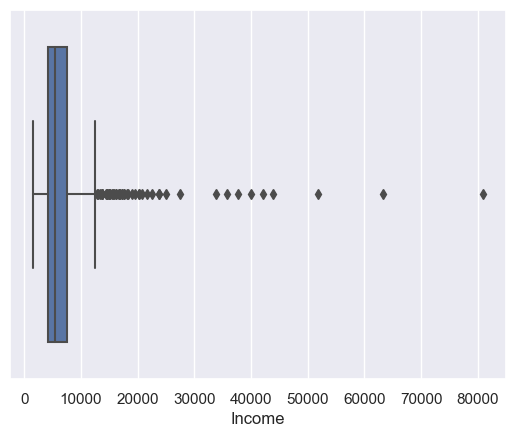

In [62]:
sns.boxplot(x='Income', data=df)

<Axes: xlabel='LoanAmount'>

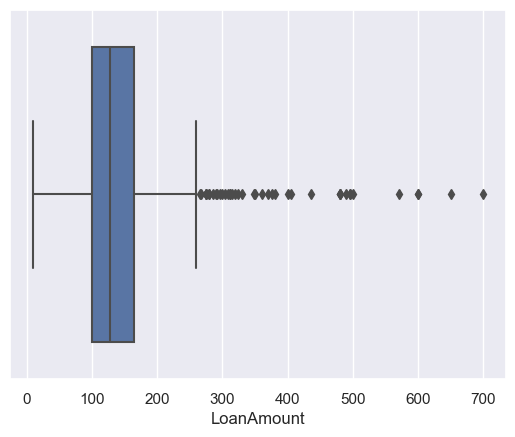

In [63]:
sns.boxplot(x='LoanAmount', data=df)

Removing Outliers

In [64]:
IQR= df['LoanAmount'].quantile(.75)- df['LoanAmount'].quantile(.25)
IQR

64.5

In [65]:
upper= df['LoanAmount'].quantile(.75) +(1.5 * IQR)
upper

261.5

In [66]:
df['LoanAmount']= np.where(df['LoanAmount']>upper,upper,df['LoanAmount'])

<Axes: >

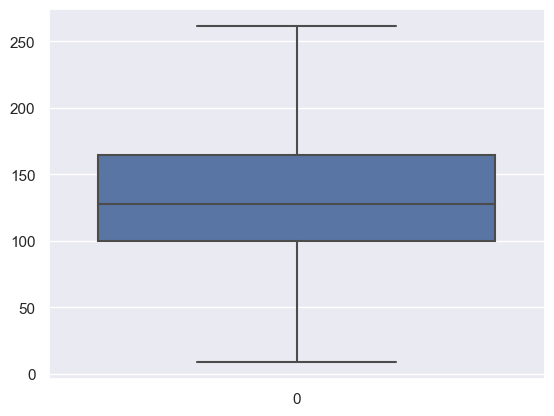

In [67]:
sns.boxplot(df['LoanAmount'])

In [68]:
IQR= df['Income'].quantile(.75)- df['Income'].quantile(.25)
IQR

3355.75

In [69]:
upper= df['Income'].quantile(.75) +(1.5 * IQR)
upper

12555.375

In [70]:
df['Income']= np.where(df['Income']>upper,upper,df['Income'])

<Axes: >

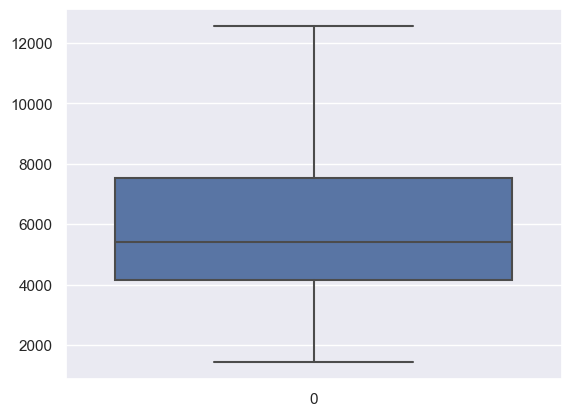

In [71]:
sns.boxplot(df['Income'])

In [72]:
df.shape

(614, 11)

Seperating Target and Features

In [73]:
X=df.drop('Loan_Status',axis=1)
Y=df['Loan_Status']

In [74]:
X=pd.get_dummies(X, drop_first=True)

In [75]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [76]:
#Balancing the dataset

from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [77]:
X,Y=sm.fit_resample(X,Y)

In [78]:
#Checking the skewness of the dataset

X.skew()

Dependents                 1.189084
LoanAmount                 0.699895
Loan_Amount_Term          -2.323285
Credit_History            -0.951293
Income                     0.938394
Gender_Male               -1.359949
Married_Yes               -0.322188
Education_Not Graduate     1.596669
Self_Employed_Yes          2.553489
Property_Area_Semiurban    0.906783
Property_Area_Urban        1.030398
dtype: float64

In [79]:
#As the dataset does not contain any negative values, we can use the power transform method to remove the skewness.


from sklearn.preprocessing import power_transform
transformed=power_transform(X)

In [80]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [81]:
scaled=sc.fit_transform(transformed)

In [82]:
X=scaled

# Modelling

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [84]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8700787401574803 on Random State = 60


Creating Train Test Split

In [85]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=60,test_size=.30)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [90]:
for m in model:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Accuracy Score of the training data is', m.score(x_train,y_train)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*100)

Accuracy Score of  LogisticRegression() is 87.00787401574803
Accuracy Score of the training data is 78.8135593220339
Confusion Matrix of  LogisticRegression()  is 
 [[ 97  21]
 [ 12 124]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       118
           1       0.86      0.91      0.88       136

    accuracy                           0.87       254
   macro avg       0.87      0.87      0.87       254
weighted avg       0.87      0.87      0.87       254

****************************************************************************************************
Accuracy Score of  RidgeClassifier() is 81.88976377952756
Accuracy Score of the training data is 77.45762711864407
Confusion Matrix of  RidgeClassifier()  is 
 [[ 83  35]
 [ 11 125]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       118
           1       0.78      0.92      0.84       136

    accuracy                         

# Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

In [93]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('\n')
    print('*'*50)
    print('\n')

Accuracy_Score of  LogisticRegression() is 87.00787401574803
cross Validation accuracy score of  LogisticRegression()  is  80.69244857706396


**************************************************


Accuracy_Score of  RidgeClassifier() is 81.88976377952756
cross Validation accuracy score of  RidgeClassifier()  is  79.27162581008736


**************************************************


Accuracy_Score of  DecisionTreeClassifier() is 78.74015748031496
cross Validation accuracy score of  DecisionTreeClassifier()  is  75.7171034094111


**************************************************


Accuracy_Score of  SVC() is 84.64566929133859
cross Validation accuracy score of  SVC()  is  80.34446322907861


**************************************************


Accuracy_Score of  KNeighborsClassifier() is 82.28346456692913
cross Validation accuracy score of  KNeighborsClassifier()  is  77.4985911524373


**************************************************


Accuracy_Score of  RandomForestClassifier() is

Hyper Parameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters= {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga'],'penalty':['l1','l2','elasticnet','none'],'C':[0.001,1,100]}

In [96]:
GCV=GridSearchCV(LogisticRegression(), parameters, cv=5)

In [98]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 1, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [99]:
GCV.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [100]:
Final_model = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')

In [102]:
Final_model.fit(x_train, y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

86.61417322834646


In [105]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)

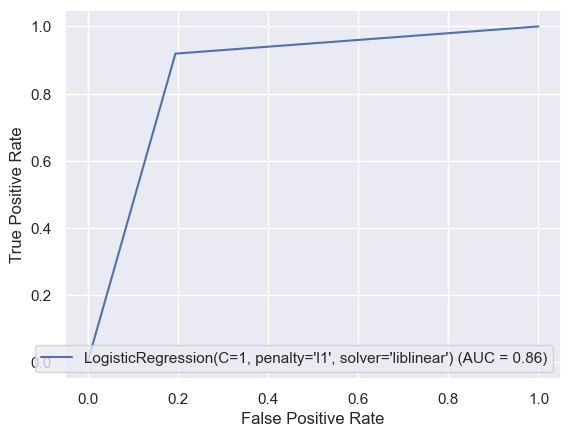

In [106]:
display.plot()

In [107]:
import joblib
joblib.dump(Final_model, "Loan_Status-prediction")

['Loan_Status-prediction']

Predicting the saved model

In [108]:
model=joblib.load("Loan_Status-prediction")

In [109]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [110]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

,predicted,original
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
249,1,0
250,1,0
251,1,1
252,0,1
